# Importación de librerias

In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,  export_graphviz 
from sklearn.tree import plot_tree
import pydotplus 
from IPython.display import Image

# Carga de datos

In [2]:
dfPred = pd.read_csv('./factors.csv')

In [3]:
dfPred.info()
#Edad, Numero de parejas sexuales
# Edad de Primera relacion sexual
# numero de embarazos
# Si fuma y cuantos años fuma
# Cuantos cigarillos fumaba por año
# Si tomo anticonceptivos y cuantas veces por año
# Dispositivo intrauterino y cuanta veces lo cambio por año
# Las enfermedades de transmisión sexual y cuantas contrajo
# Cin: Las células anormales se encuentran en la superficie del cuello uterino.
# Letras DX representan cerca de conjunto de pruebas médicas y herramientas: 
# Los virus del papiloma humano HPV
# El diagnóstico precoz del cáncer de cuello uterino Hilseman
# Schiller Prueba en la que se aplica yodo al cuello uterino. 
# 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          858 non-null    int64  
 1   Age                                 858 non-null    int64  
 2   Number of sexual partners           858 non-null    float64
 3   First sexual intercourse            858 non-null    float64
 4   Num of pregnancies                  858 non-null    float64
 5   Smokes                              858 non-null    float64
 6   Smokes (years)                      858 non-null    float64
 7   Smokes (packs/year)                 858 non-null    float64
 8   Hormonal Contraceptives             858 non-null    float64
 9   Hormonal Contraceptives (years)     858 non-null    float64
 10  IUD                                 858 non-null    float64
 11  IUD (years)                         858 non-n

In [4]:
dfPred.shape # Comprobamos las dimensiones de nuestro dataframe 

(858, 37)

# Linpieza del dataframe

In [5]:
dfPred.isnull().any() #Verificamos si existen dcolumnas con datos nulos

Unnamed: 0                            False
Age                                   False
Number of sexual partners             False
First sexual intercourse              False
Num of pregnancies                    False
Smokes                                False
Smokes (years)                        False
Smokes (packs/year)                   False
Hormonal Contraceptives               False
Hormonal Contraceptives (years)       False
IUD                                   False
IUD (years)                           False
STDs                                  False
STDs (number)                         False
STDs:condylomatosis                   False
STDs:cervical condylomatosis          False
STDs:vaginal condylomatosis           False
STDs:vulvo-perineal condylomatosis    False
STDs:syphilis                         False
STDs:pelvic inflammatory disease      False
STDs:genital herpes                   False
STDs:molluscum contagiosum            False
STDs:AIDS                       

In [6]:
dfPred.isnull().sum() # Realizamos la suma de cuantos datos nulos tiene cada columna

Unnamed: 0                            0
Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0


In [7]:
features = dfPred.drop(columns = "Biopsy") #Guardanos nuestras columnas que van a ser las caracteristicas de nuestro modelo

features.info() # excepto la columna con la etiqueta Biopsy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          858 non-null    int64  
 1   Age                                 858 non-null    int64  
 2   Number of sexual partners           858 non-null    float64
 3   First sexual intercourse            858 non-null    float64
 4   Num of pregnancies                  858 non-null    float64
 5   Smokes                              858 non-null    float64
 6   Smokes (years)                      858 non-null    float64
 7   Smokes (packs/year)                 858 non-null    float64
 8   Hormonal Contraceptives             858 non-null    float64
 9   Hormonal Contraceptives (years)     858 non-null    float64
 10  IUD                                 858 non-null    float64
 11  IUD (years)                         858 non-n

In [8]:
target = dfPred.Biopsy  #Guardamos en nuestra variable objetivo solamente la columna biopsia que nos va a servir para comprobar nuestro modelo
target.sample(10)

69     0
270    0
259    0
501    0
251    0
836    0
468    0
802    0
170    0
180    0
Name: Biopsy, dtype: int64

In [9]:
modelPred = DecisionTreeClassifier() #Instanciamos nuestro algoritmo a una variable 

In [10]:
modelPred.fit(X = features, y = target) #Esto nos permitira estimar un objeto y ajustar el modelo  
#que estamos creando con los datos que serviran para entrenamiento de nuestro modelo.

DecisionTreeClassifier()

In [11]:
modelPred.score(features, target) #Nos permitira saber que tan preciso es nuestro modelo de prediccion 

1.0

In [12]:
#clf=DecisionTreeClassifier(max_depth=3).fit(X = features, y = target)

In [14]:
arbol = export_graphviz(modelPred, out_file = None , filled=True, rounded=True, feature_names=features.columns)
#Permite exportar la visualizacion de nuestro arbol a una variable

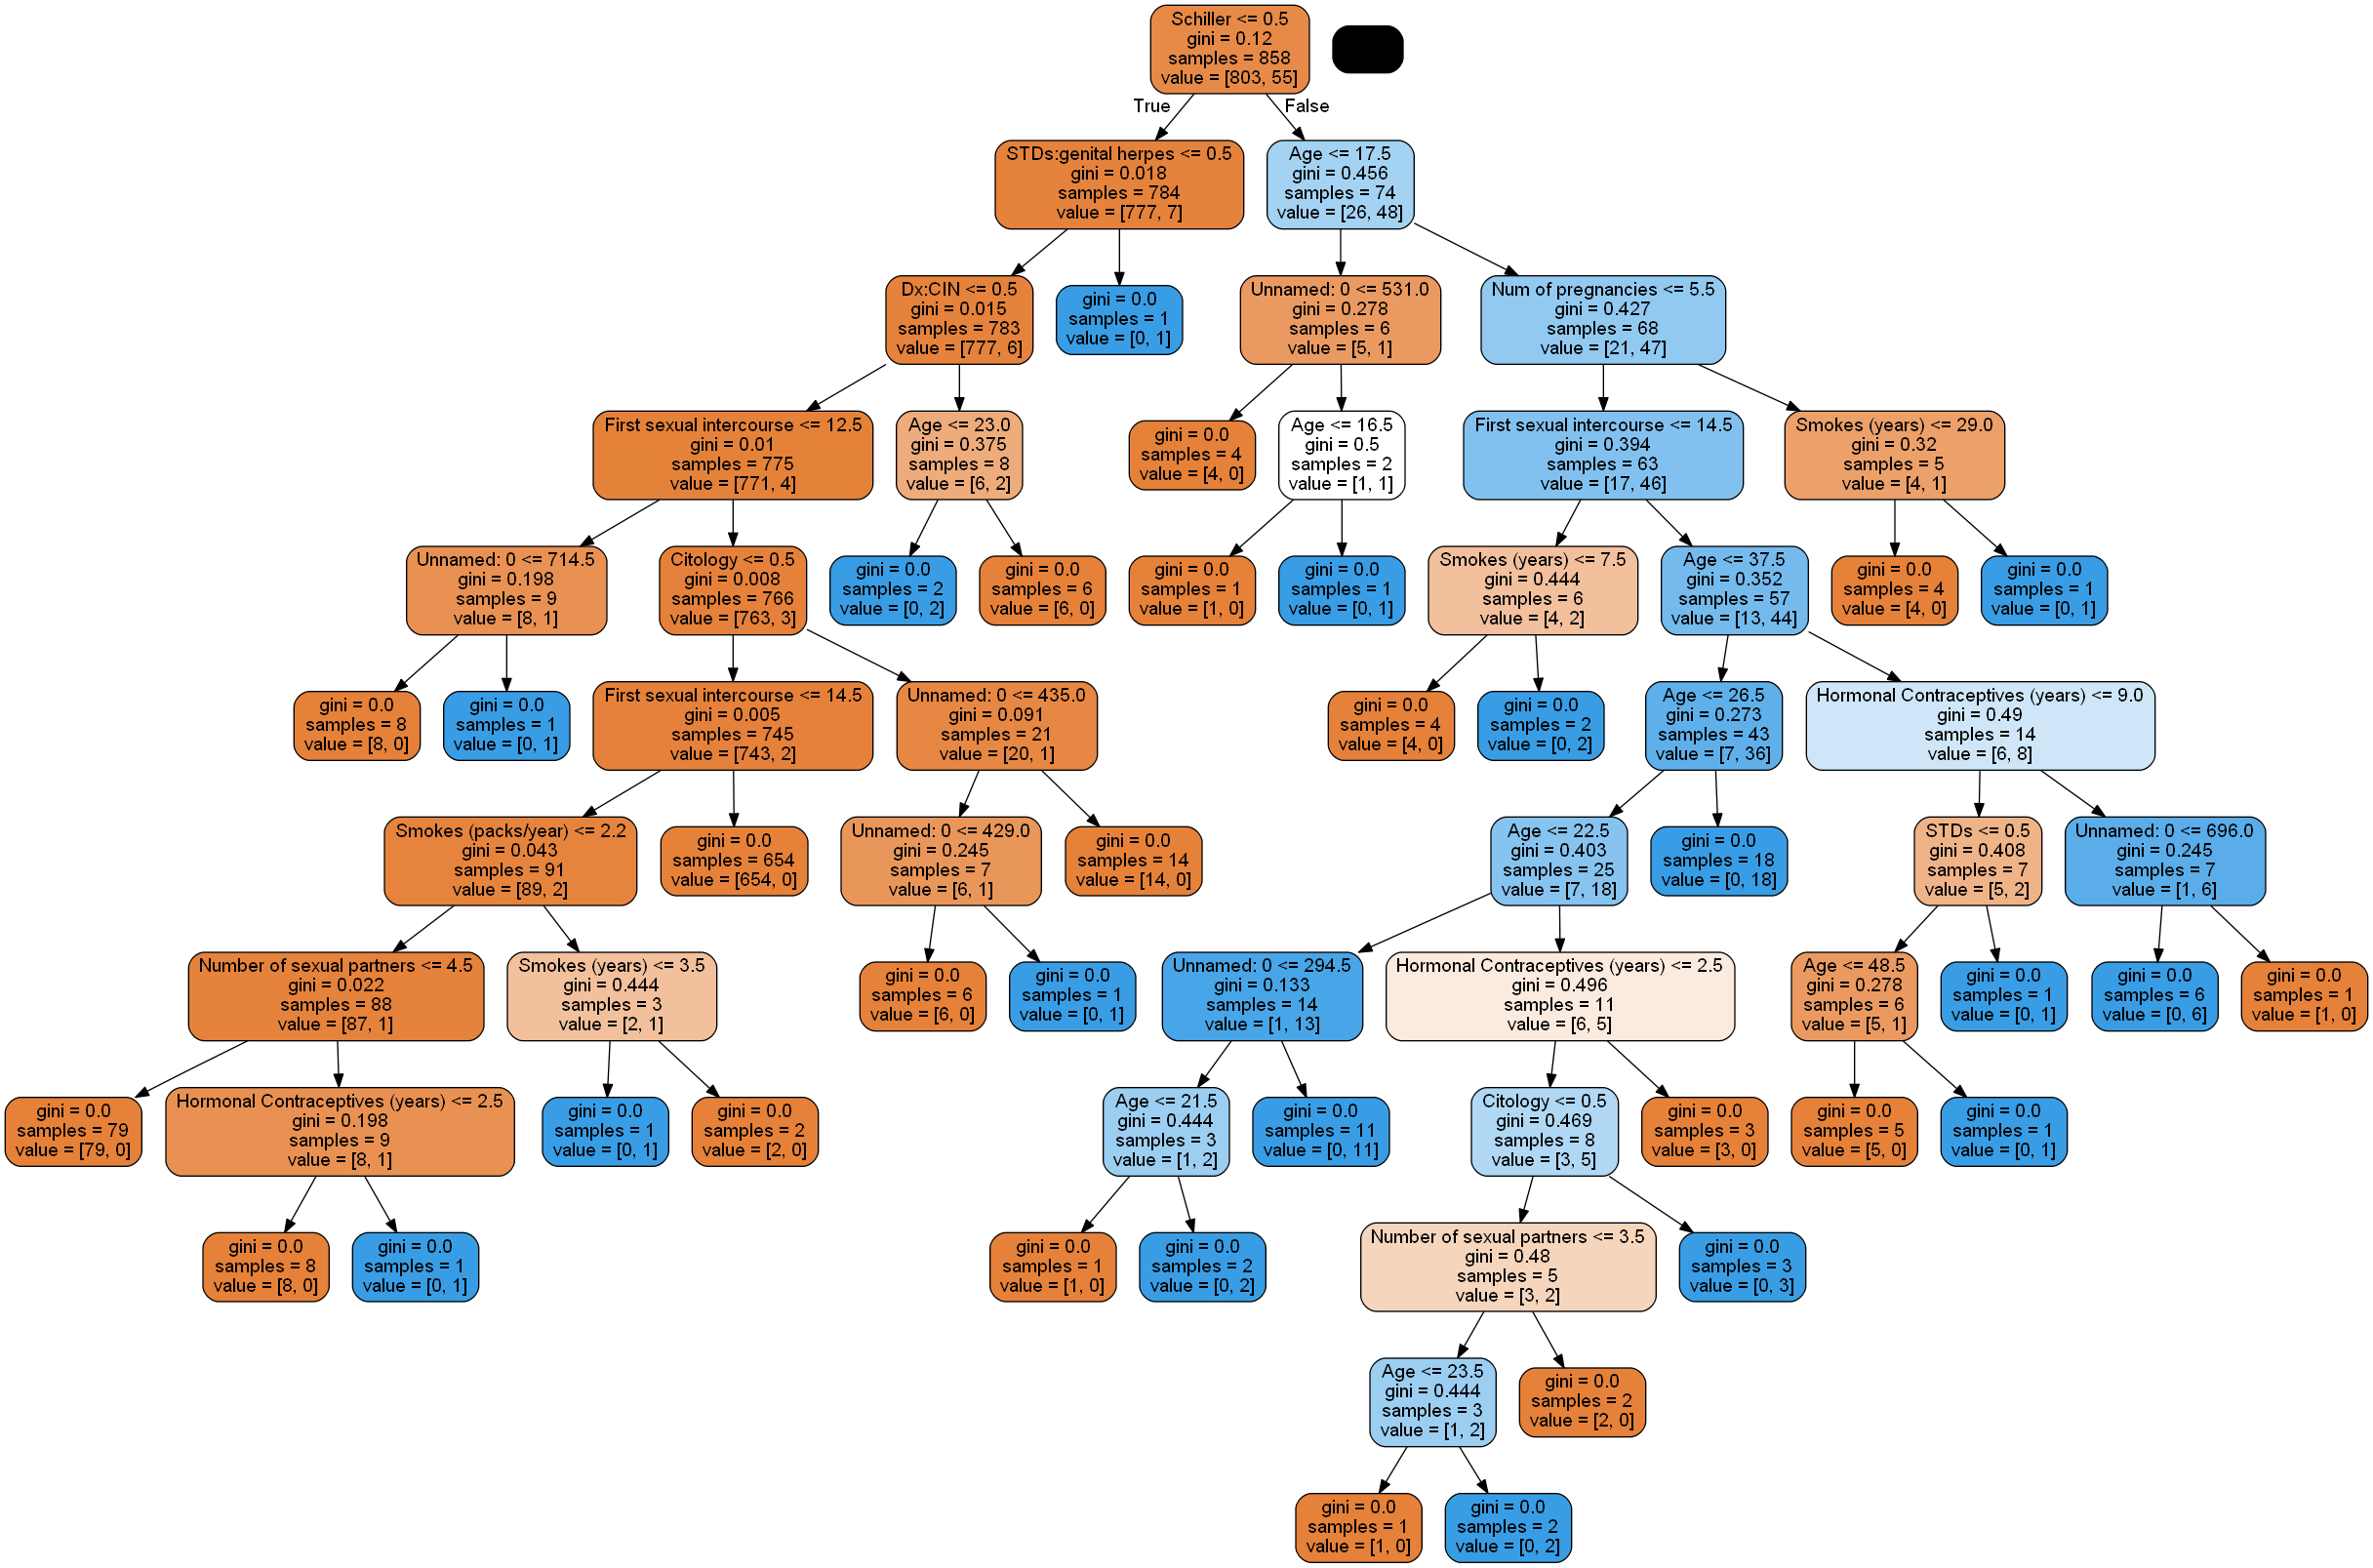

In [17]:
graph = pydotplus.graph_from_dot_data(arbol)
image = graph.create_png()
graph.write_png("imagen.png")
Image(filename="imagen.png")


In [229]:
prueba=features.sample() #Crearemos una variable de prueba para presentar un ejemplo de prueba que servira para 
#comparar los resultados de nuestro arbol con los datos iniciales
prueba

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
515,515,31,4.0,15.0,4.0,0.0,0.0,0.0,1.0,1.0,...,0,4.0,3.0,0,0,0,0,0,0,0


In [234]:
df_r = dfPred.sample(100)[['Dx:Cancer']]
df_r.sum()

Dx:Cancer    0
dtype: int64

In [170]:
prueba["Schiller"] <= 0.5 

100    True
Name: Schiller, dtype: bool

In [171]:
prueba["STDs:genital herpes"] <=0.5

100    True
Name: STDs:genital herpes, dtype: bool

In [172]:
prueba["Dx:CIN"] <=0.5

100    True
Name: Dx:CIN, dtype: bool

In [177]:
modelPred.predict_proba(prueba) # Mediante el metodo de prediccion veremos una estimacion 
#de nuestra estimacion sobre los resultados obtenidos del arbol

array([[0.26984127, 0.73015873]])

In [194]:
predict = modelPred.predict(features)

In [195]:
dfPred['predict'] = predict

In [198]:
df_predict = dfPred.sample(858)[['Biopsy', 'predict']]

In [201]:
(dfPred.Biopsy == dfPred.predict).mean()

0.9708624708624709